# Computing Maximum Drawdown

In this lab, we'll develop the code to compute the maximum drawdown of a return series, and we'll start to develop our own module which will act as a toolkit that we will add to during the course.

First, let's read the return series we processed in the previous lab:


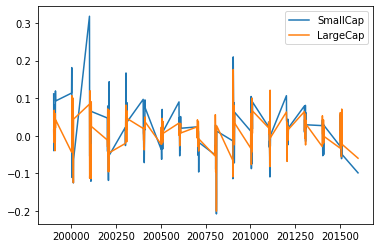

In [2]:
import pandas as pd
import matplotlib as plt
%matplotlib inline

me_m = pd.read_csv("../Homework/Portfolios.csv",
                   header=0, index_col=0, parse_dates=True, na_values=-99.99)
ret = me_m[['Lo 20','Hi 20']]
rets= ret.loc['1999':'201601']
rets.columns = ['SmallCap', 'LargeCap']
rets = rets/100
rets.plot.line()

## Timeseries - forcing the index to be a datetime

We asked Pandas to `parse_dates` in `read_csv()`. Let's check if it was able to do so with the index:

In [3]:
rets.index

Int64Index([199901, 199902, 199903, 199904, 199905, 199906, 199907, 199908,
            199909, 199910,
            ...
            201504, 201505, 201506, 201507, 201508, 201509, 201510, 201511,
            201512, 201601],
           dtype='int64', length=205)

The `dtype` is `int64` which suggests that it was not automatically converted to a date time index, so let's do that now manually. The simplest way to force it to be a timeseries is by reformatting the index data to a `datetime` type as follows:

In [4]:
rets.index = pd.to_datetime(rets.index, format="%Y%m")
rets.index

DatetimeIndex(['1999-01-01', '1999-02-01', '1999-03-01', '1999-04-01',
               '1999-05-01', '1999-06-01', '1999-07-01', '1999-08-01',
               '1999-09-01', '1999-10-01',
               ...
               '2015-04-01', '2015-05-01', '2015-06-01', '2015-07-01',
               '2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01',
               '2015-12-01', '2016-01-01'],
              dtype='datetime64[ns]', length=205, freq=None)

Now that the DataFrame has a datetime index, we can treat the entire dataframe as a timeseries, which makes things very convenient. For instance, we can extract just the returns in 2008 as follows:

In [5]:
rets["2008"]

,SmallCap,LargeCap
2008-01-01,-0.0502,-0.0531
2008-02-01,-0.0270,-0.0278
2008-03-01,-0.0356,-0.0200
2008-04-01,0.0070,0.0560
2008-05-01,0.0289,0.0232
2008-06-01,-0.0891,-0.0964
2008-07-01,0.0074,-0.0219
2008-08-01,0.0172,0.0035
2008-09-01,-0.1163,-0.1238
2008-10-01,-0.2080,-0.2006


This looks good except that we know this is monthly data, and it's showing up with an index that is date stamped. We can fix this using the `to_period` method. We'll see several more examples of Pandas support for timeseries during the course.

In [6]:
rets.index = rets.index.to_period('M')
rets.head()

,SmallCap,LargeCap
1999-01,0.1114,0.0153
1999-02,-0.0399,-0.0172
1999-03,-0.0308,0.0368
1999-04,0.0824,0.0679
1999-05,0.0435,-0.0048


In [7]:
rets.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 205 entries, 1999-01 to 2016-01
Freq: M
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SmallCap  205 non-null    float64
 1   LargeCap  205 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


In [8]:
rets.describe()

,SmallCap,LargeCap
count,205.000000,205.000000
mean,0.010667,0.006024
std,0.066360,0.049950
min,-0.208000,-0.200600
25%,-0.028200,-0.021700
50%,0.009500,0.008800
75%,0.047200,0.035000
max,0.317900,0.176200


## Computing Drawdowns

1. Convert the time series of returns to a time series that represents a wealth index
2. Compute a time series of the previous peaks
3. Compute the Drawdown as the difference between the previous peak and the current value

Let's do this for Large Cap stocks.

In [41]:
#wealthindex is value of portfolio asit componds over time
#use cumprod to get portfolio wealth
#example starts w $1000 imvestment
wealth_index = 1000*(1+rets["LargeCap"]).cumprod()

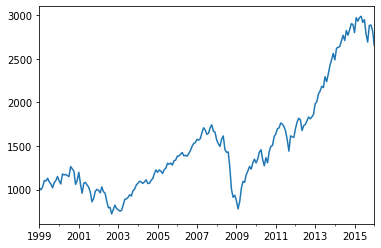

In [42]:
wealth_index.plot()

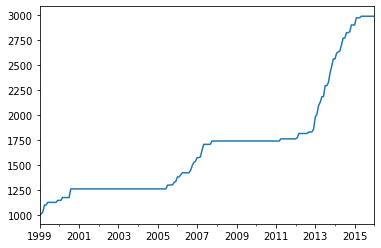

In [43]:
previous_peaks = wealth_index.cummax()
previous_peaks.plot()

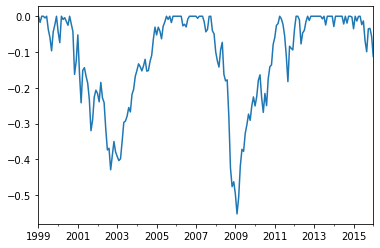

In [44]:
#want percentage loss from previous peak
drawdown = (wealth_index - previous_peaks)/previous_peaks
drawdown.plot()

In [45]:
#now you have drawdowns for each year
print(drawdown['2009':'2010'])

2009-01   -0.497737
2009-02   -0.552735
2009-03   -0.505951
2009-04   -0.418900
2009-05   -0.372063
2009-06   -0.377714
2009-07   -0.327434
2009-08   -0.303625
2009-09   -0.273611
2009-10   -0.291044
2009-11   -0.250563
2009-12   -0.225532
2010-01   -0.250780
2010-02   -0.224632
2010-03   -0.179195
2010-04   -0.163764
2010-05   -0.227903
2010-06   -0.268902
2010-07   -0.215897
2010-08   -0.249927
2010-09   -0.174845
2010-10   -0.141426
2010-11   -0.135931
2010-12   -0.079075
Freq: M, Name: LargeCap, dtype: float64


In [46]:
#MaxDrawdown aka largest drawdown
drawdown.min()

-0.5527349978713653

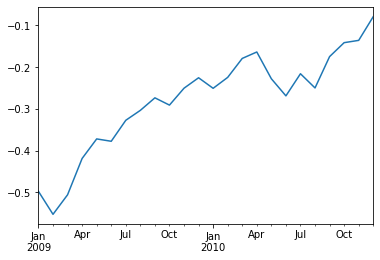

In [47]:
#drawdowns for a specific time period
years= drawdown["2009":"2010"]
years.plot()

In [38]:
#max drawdowns for a specific time period
drawdown["2009":"2010"].min()

-0.5527349978713653

In [36]:
#or
years.min()

-0.5527349978713653

# Creating a Drawdown Function

Redoing this analysis for SmallCap would be tedious, since we would need to re-enter all these commands at the prompt. Instead, let's create our first function that will form the first tool in our financial toolkit.

The function will take as input, a timeseries of returns, and return a timeseries as a DataFrame that contains the wealth index, the previous peaks and the drawdowns as a percent.

In [51]:
def drawdown(return_series: pd.Series):
    """Takes a time series of asset returns.
       returns a DataFrame with columns for
       the wealth index, 
       the previous peaks, and 
       the percentage drawdown
    """
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({"Wealth": wealth_index, 
                         "Previous Peak": previous_peaks, 
                         "Drawdown": drawdowns})

drawdown(rets["LargeCap"]).head()

,Wealth,Previous Peak,Drawdown
1926-07,1032.900000,1032.900000,0.0000
1926-08,1071.117300,1071.117300,0.0000
1926-09,1078.293786,1078.293786,0.0000
1926-10,1052.091247,1078.293786,-0.0243
1926-11,1080.497711,1080.497711,0.0000


In [52]:
drawdown(rets["LargeCap"]).min()

Wealth            405.769102
Previous Peak    1032.900000
Drawdown           -0.840038
dtype: float64

In [53]:
drawdown(rets["SmallCap"]).min()

Wealth           491.240323
Previous Peak    985.500000
Drawdown          -0.833001
dtype: float64

In [54]:
drawdown(rets["LargeCap"])["Drawdown"].idxmin()

Period('1932-05', 'M')

In [55]:
drawdown(rets["SmallCap"])["Drawdown"].idxmin()

Period('1932-05', 'M')

In [56]:
drawdown(rets["LargeCap"]["1975":])["Drawdown"].idxmin()

Period('2009-02', 'M')

In [57]:
drawdown(rets["SmallCap"]["1975":])["Drawdown"].idxmin()

Period('2009-02', 'M')

In [58]:
drawdown(rets["SmallCap"]["1975":])["Drawdown"].min()

-0.6312068077252386

In [ ]:
pd.DataFrame.read_csv("../Homework/